In [1]:
import sys
import pandas as pd
import numpy as np
import mglearn
import sklearn
import matplotlib.pyplot as plt

# Clustering
- goal is to split up the data in such a way that points within a single cluster are very simliar and points in different clusters are different
- assign (or predict) a number to each data point, indicating which cluster a particular point belongs

## k-Means Clustering
- one of simplest and most commonly used clustering algorithms
- finds *cluster centers* that are representative of certain regions of the data
- alternates between two steps:
    - assigning each data point to the closest cluster center
    - resetting each cluster center as the mean of the data points that are assigned to it
    



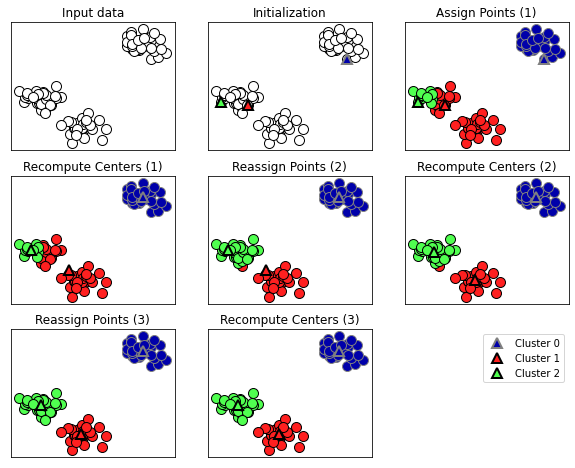

In [2]:
mglearn.plots.plot_kmeans_algorithm()


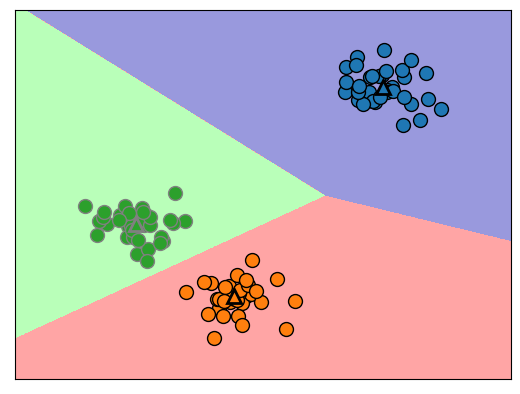

In [4]:
mglearn.plots.plot_kmeans_boundaries()

In [6]:
# apply k-means with scikit-learn with synthetic data
# this does require setting the parameter of n_clusters
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [11]:
print("Cluster memberships: \n{}".format(kmeans.labels_))
print(kmeans.predict(X))

Cluster memberships: 
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


- similar to classification in that the algorithm assigns a label to each point, however, there is no ground truth so the labels themselves have no a priori meaning.
- due to the random nature of the initialization of the cluster centroids, there is no expectation running this algorithm again that those data points labeled '2' are labeled '2' again, but they could be labeled '1' or '0', depending on their relationship to the randomly initialized cluster centroids.

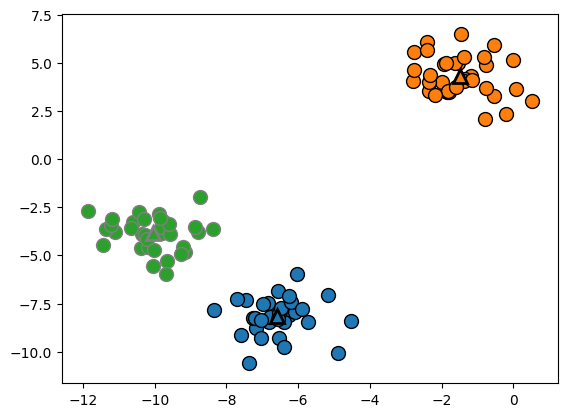

In [14]:
mglearn.discrete_scatter(X[:,0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
    markers='^', markeredgewidth=2
)

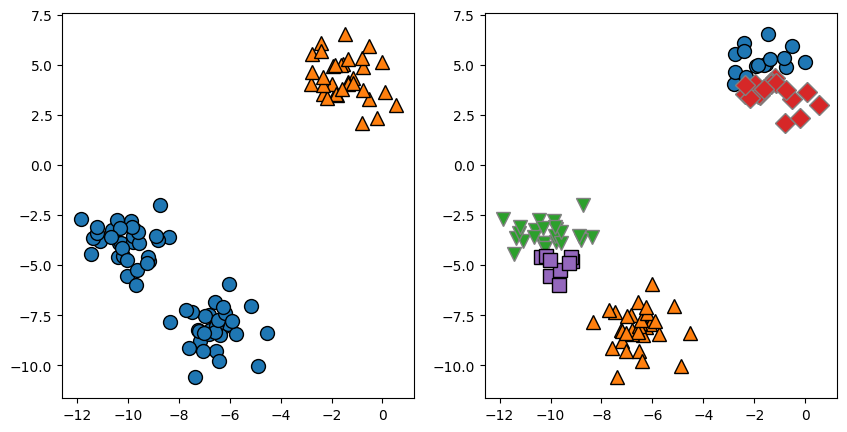

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

#using two cluster centers
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

#using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[1])

### Failure cases of k-means
- knowing the "right" number of clusters for a given dataset, may not always result in k-means algorithm being able to recover them
- clusters are defined by their center, and therefore produces clusters that are a convex shape, capturing relatively simple shapes
- assumes that all clusters have the same "diameter" in some sense, as clusters are bounded precisely the bisectional distance between themselves.

Text(0, 0.5, 'Feature 1')

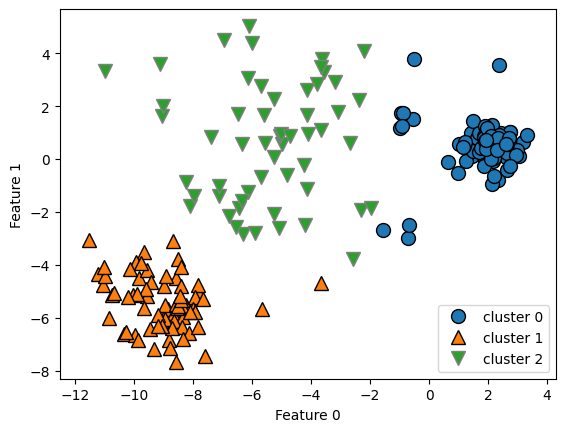

In [17]:
X_varied, y_varied = make_blobs(n_samples=200,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


- kmeans assumes that all directions are equally important for each cluster

Text(0, 0.5, 'Feature 1')

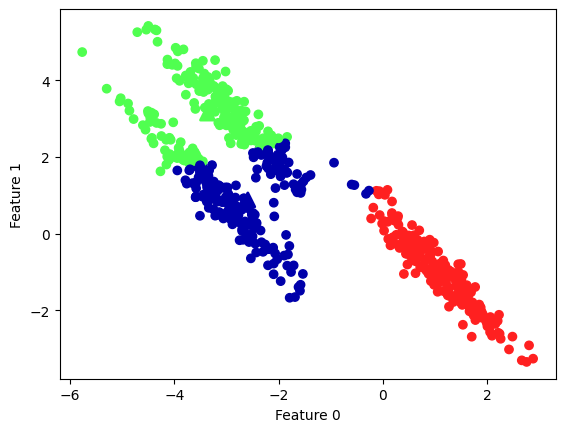

In [20]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

#transform the data to be stretched
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
    marker='^', c=[0,1,2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- with the data stretched toward the diagonal, and k-means only considering the distance to the nearest cluster center, it can't handle this kind of data well
- it also performs poorly if the clusters have more complex shapes

Text(0, 0.5, 'Feature 1')

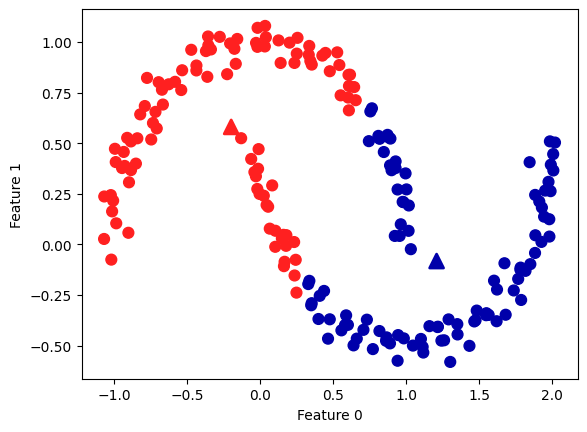

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Vector quantization, or seeing k-means as decomposition
- parallels between k-means and the decomposition methods like PCA and NMF
    - Both PCA and NMF try to express the data points as a sum over some components. Each point in k-means is being represented using only a single component (given by the cluster center). This view as a method of decomposition is call vector quantization


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1 
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255


X_train, X_test, y_train ,y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)


/home/friend/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/friend/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [33]:
kmeans.predict(X_test)


NameError: name 'ax' is not defined

Text(0, 0.5, 'nmf')

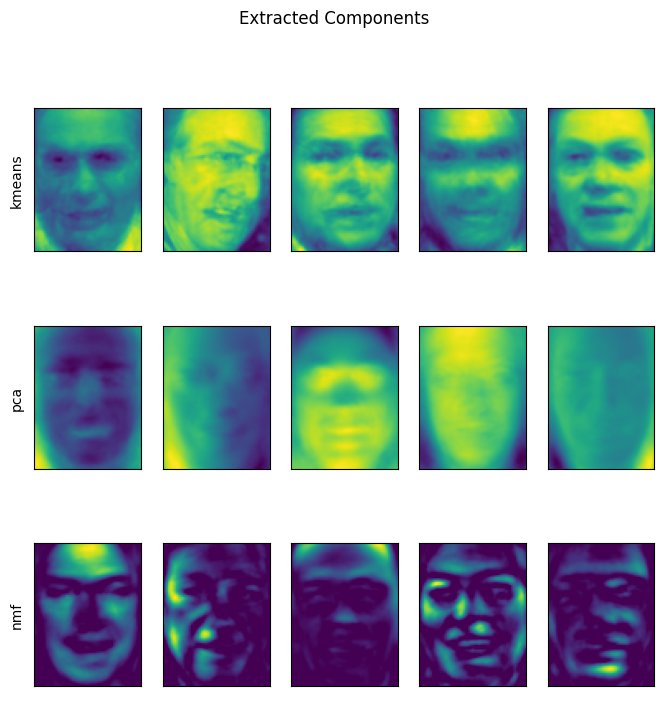

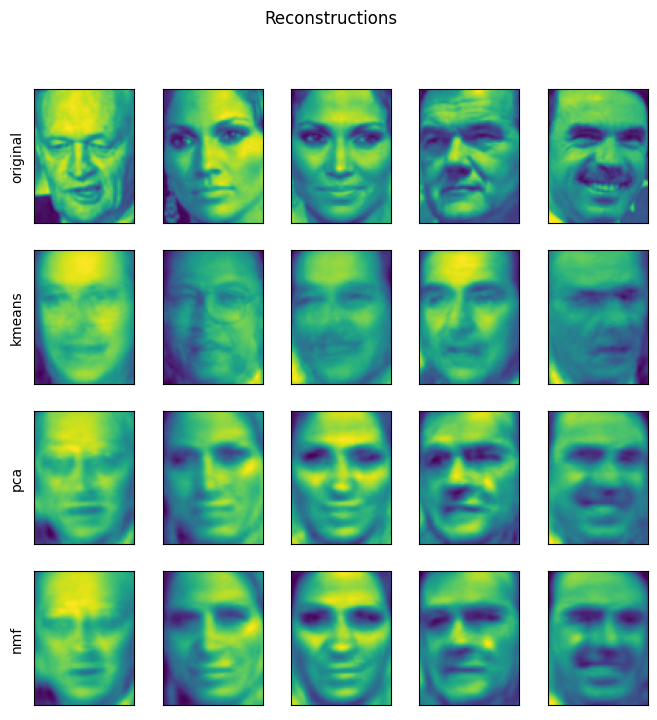

In [34]:
image_shape = people.images[0].shape

fig, axes = plt.subplots(3, 5, figsize=(8,8),
    subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
        ax[0].imshow(comp_kmeans.reshape(image_shape))
        ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
        ax[2].imshow(comp_nmf.reshape(image_shape)
)

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
    figsize=(8,8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0,0].set_ylabel("original")
axes[1,0].set_ylabel("kmeans")
axes[2,0].set_ylabel("pca")
axes[3,0].set_ylabel("nmf")



- interestingly, when performing vector quantization using kmeans we use many more clusters than input dimensions to encode our data

Cluster memberships:
:[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


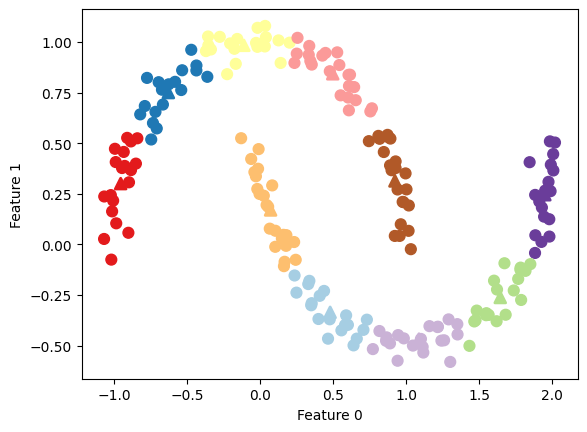

In [55]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans= KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60,
    marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("Cluster memberships:\n:{}".format(y_pred))

- we can view this as each point having 10 new features, each being 0 save the one that represens the cluster center the point is assigned.
- using the 10-dimensional representation, it is possible to separate the two half-moon shapes using a linear model.
- we can make an even more expressive representation of the data by using the distances to each of the cluster centers as features.

In [56]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))


Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]
